## Import Dependencies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn import metrics

## Data Collection and Processing

In [5]:
car_dataset = pd.read_csv("car data.csv")

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_dataset.shape

(301, 9)

In [8]:
# Statistical measures
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#  checking for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
# Checking the distribution of the data
print("Fuel Type:\n",car_dataset['Fuel_Type'].value_counts())
print("Seller_Type:\n",car_dataset['Seller_Type'].value_counts())
print("Transmission:\n",car_dataset['Transmission'].value_counts())

Fuel Type:
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type:
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission:
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [27]:
# Encoding the categorical data: Changing the text data to numeric 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}, 
                     'Seller_Type':{'Dealer':0,'Individual':1},
                    'Transmission':{'Manual':0,'Automatic':1}},inplace = True)


In [28]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [29]:
# Splitting into data and lable
X = car_dataset.drop(['Car_Name','Selling_Price'], axis =1)
Y = car_dataset['Selling_Price']

In [61]:
print(X)
print(Y)
X.head()

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


## Splitting into training and test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

## Model Training and Evaluation

### Linear regression

In [33]:
lin_reg_model = LinearRegression()

In [34]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [36]:
# Prediction on trainind data
train_data_predict = lin_reg_model.predict(X_train)

In [37]:
# Calculating the error Score for Linear Regression Model
# R square Error
train_error_score = metrics.r2_score(Y_train, train_data_predict)
print("R square error square for linear Regression Model: ", train_error_score)

R square error square for linear Regression Model:  0.8799451660493705


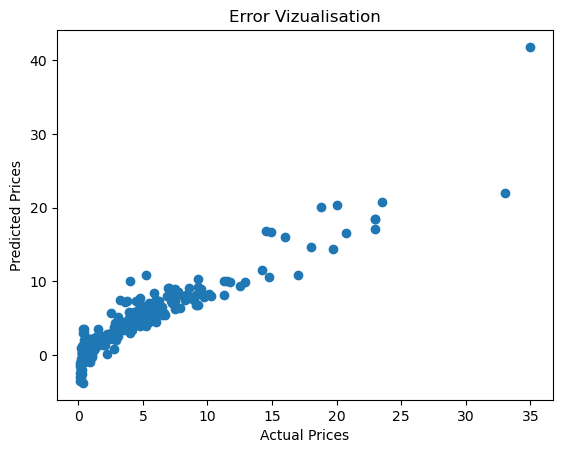

In [38]:
# Plot the actual prices and predicted prices
plt.scatter(Y_train, train_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Error Vizualisation')
plt.show()

In [39]:
# Prediction on test data
test_data_predict = lin_reg_model.predict(X_test)

In [40]:
# R square Error
test_error_score = metrics.r2_score(Y_test, test_data_predict)
print("R square error square for linear Regression Model: ", test_error_score)

R square error square for linear Regression Model:  0.836576671502687


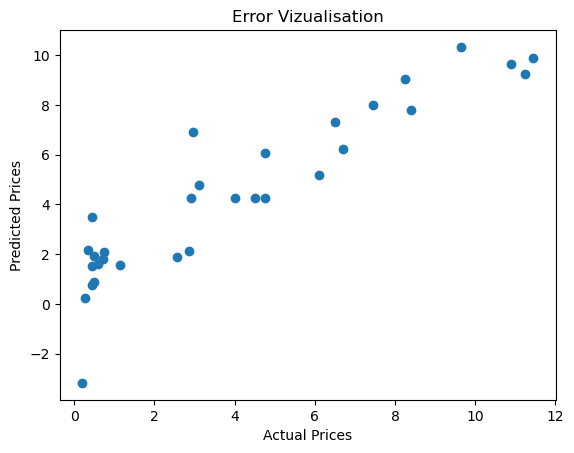

In [41]:
# Plot the actual prices and predicted prices
plt.scatter(Y_test, test_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Error Vizualisation')
plt.show()

### Lasso Regression

In [42]:
lass_reg_model = Lasso()

In [43]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [44]:
# Prediction on trainind data
train_data_predict = lass_reg_model.predict(X_train)

In [67]:
# Calculating the error Score for Linear Regression Model
# R square Error
train_error_score = metrics.r2_score(Y_train, train_data_predict)
print("R square error square for Lasso Regression Model: ", train_error_score)

R square error square for Lasso Regression Model:  0.999988239034454


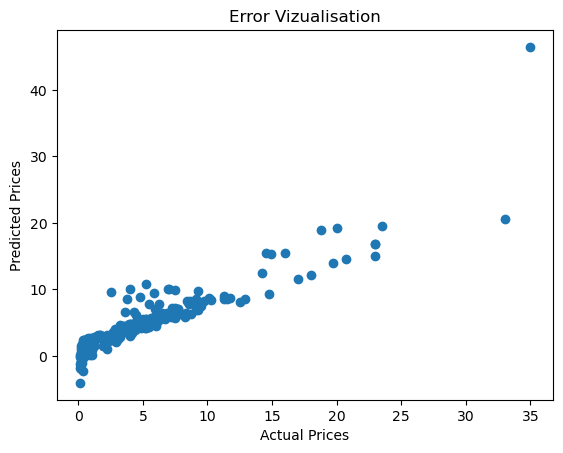

In [46]:
# Plot the actual prices and predicted prices
plt.scatter(Y_train, train_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Error Vizualisation')
plt.show()

In [48]:
# Prediction on test data
test_data_predict = lass_reg_model.predict(X_test)

In [68]:
# R square Error
test_error_score = metrics.r2_score(Y_test, test_data_predict)
print("R square error square for Lasso regression Model: ", test_error_score)

R square error square for Lasso regression Model:  0.9739216554116775


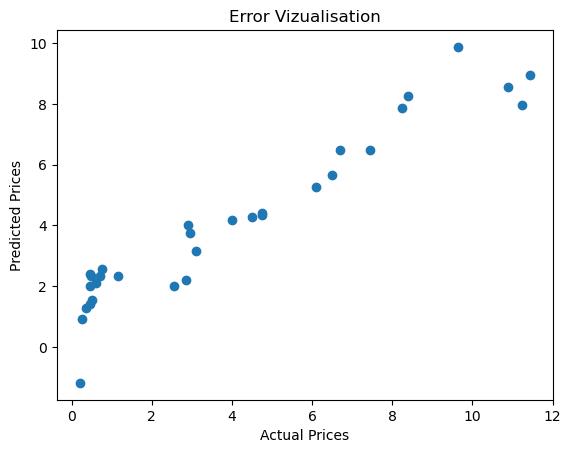

In [50]:
# Plot the actual prices and predicted prices
plt.scatter(Y_test, test_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Error Vizualisation')
plt.show()

### XGBoost Regression

In [52]:
xgb_reg_model = xg.XGBRegressor()

In [53]:
xgb_reg_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
# Prediction for trained data
train_data_predict=xgb_reg_model.predict(X_train)

In [69]:
# R Score Error
train_error_score = metrics.r2_score(train_data_predict, Y_train)
print("R Square error score for Trained data: ", train_error_score)

R Square error score for Trained data:  0.9999882347921428


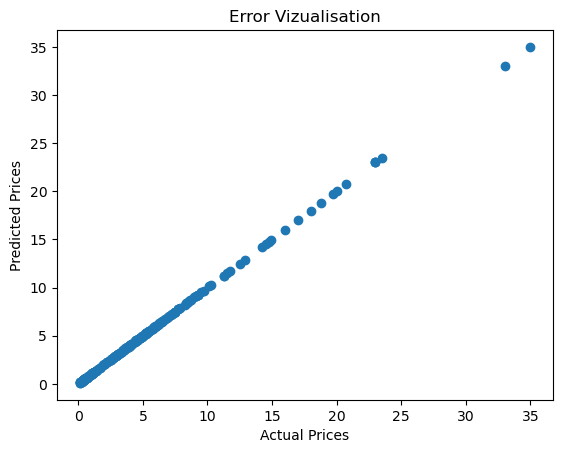

In [59]:
# Plot the graph for actual and predicted values
plt.scatter(Y_train, train_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Error Vizualisation")
plt.show()

In [57]:
# Prediction for test data
test_data_predict=xgb_reg_model.predict(X_test)

In [70]:
# R Score Error
test_error_score = metrics.r2_score(test_data_predict, Y_test)
print("R Square error score for Test data: ", test_error_score)

R Square error score for Test data:  0.9717000722567458


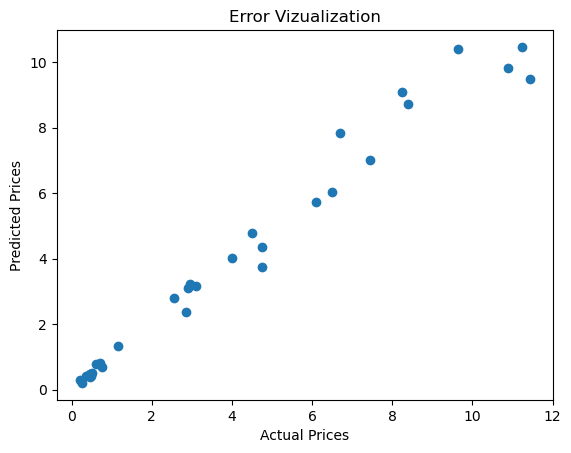

In [60]:
# Plot the actual and predict value
plt.scatter(Y_test,test_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Error Vizualization')
plt.show()

## Building a Predictive System

In [66]:
car_data = (2014,5.59,27000,0,0,0,0)
car_data_np = np.asarray(car_data)
car_data_reshape = car_data_np.reshape(1,-1)
prediction= xgb_reg_model.predict(car_data_reshape)
print(prediction)

[2.014e+03 5.590e+00 2.700e+04 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
[3.3651168]
